# Introduction to Machine Learning for Physics

This notebook accompanies a QMAP FSG journal club talk during the winter quarter of 2022. The goal of the talk is to introduce some ideas from machine learning at a very elementary level.

![machine](./Downloads/ml_pic_small_qmap.png)

First I should try to justify why we, as theoretical physicists, might be interested in machine learning. But thankfully this task is fairly easy, since a large number of machine learning related papers have been appearing on the arXiv of late, including several today! (See [2202.05845](https://arxiv.org/abs/2202.05845), [2202.05896](https://arxiv.org/abs/2202.05896), and [2202.06086](https://arxiv.org/abs/2202.06086).)

The first applications of machine learning to theoretical physics focused on finding patterns in the string landscape (e.g. [1706.02714](https://arxiv.org/abs/1706.02714), [1706.03346](https://arxiv.org/abs/1706.03346), [1706.07024](https://arxiv.org/abs/1706.07024), [1707.00655](https://arxiv.org/abs/1707.00655)). The idea is the following:
- A generic compactification of string theory involves a large number of choices for parameters like topological quantities which specify the compactification manifold in addition to fluxes, brane winding numbers, etc.
- One would like to look within this enormous search space for compactifications which both satisfy certain consistency conditions (like anomaly cancellation constraints) and, ideally, have physics similar to our world (like a small cosmological constant).
- The hope is that machine learning techniques can both (1) expedite such a search for realistic compactifications, and (2) identify general patterns within the landscape, for instance by finding clusters of similar compactifications whose parameters are related in some way.

However, even if you are not interested in compactifications and string phenomenology, there have since been many other physical problems where ML techniques find applications:
- Machine learning can be used to find numerical approximations to the metric on a Calabi-Yau manifold, as in [1910.08605](https://arxiv.org/abs/1910.08605), improving on Donaldson's algorithm.
- Neural networks can be used to classify different phases of matter and identify phase transitions, as in [this work](https://www.nature.com/articles/nphys4037).
- Learning models have been applied to holography, both in the traditional sense of predicting outputs from inputs (e.g. predicting bulk metric from QCD observables in AdS/QCD [here](https://arxiv.org/abs/2005.02636) or from multi-region entanglement entropy [here](https://arxiv.org/abs/2110.01115), or models where the neural network represents the metric itself [here](https://arxiv.org/abs/1802.08313), more like a random tensor network).
- Finally, quantum field theory dynamics have also been proposed to be _modeled_ (not predicted) by neural networks as [here](https://arxiv.org/abs/2112.04527).

If you have never seen any applications of machine learning before, I am legally obligated to show you the example of classifying handwritten digits (apologies that this is not physics).


## Example 1: Digit Classification Using SVM


First we'll import some standard tools. If you're running this notebook on your own machine, you execute cells by clicking inside and hitting Shift + Enter, as in Mathematica.

In [1]:
# Importing some libraries.

import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Next we'll load our data. Each data point will be an $8 \times 8$ array of numbers, each of which is an integer between $0$ (white) and $16$ (black).

Such a data point represents a grayscale image which corresponds to a handwritten digit. We can view the raw data, as well as a visualization, of a datapoint as follows.

In [2]:
# Load the pre-packaged digit data set and display one of them.

digits = datasets.load_digits()
print(len(digits.data), "digits loaded.")

1797 digits loaded.


[ 0.  0.  1. 11. 16. 16. 10.  0.  0.  0. 13. 14.  8. 12. 11.  0.  0.  0.
  4.  0.  0. 13.  4.  0.  0.  0.  0.  0.  3. 15.  0.  0.  0.  0.  2. 15.
 16. 16.  9.  0.  0.  0.  3. 13. 16.  8.  1.  0.  0.  0.  0.  7. 10.  0.
  0.  0.  0.  0.  0. 13.  3.  0.  0.  0.]


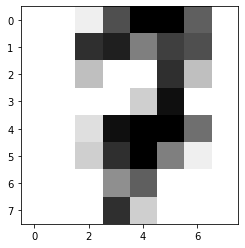

In [3]:
n_view = 300
print(digits.data[n_view])
plt.imshow(digits.images[n_view], cmap=plt.cm.binary, interpolation='nearest')

Next we'll use a built-in machine learning algorithm in the scikit-learn library called a _support vector classifier_. Under the hood, this algorithm is measuring distances between example digits in the training set using a certain [kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and attempting to find hyperplanes in feature space which separate the training samples into different classes.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png" alt="svc" style="width: 600px;"/>

In [4]:
# Some preprocessing (image arrays must be flat).
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier.
clf = svm.SVC(gamma=0.001)

# Gamma is a certain coefficient for some radial basis functions
# used in the so-called "kernel trick" to be mentioned later.

# Split data into 50% train and 50% test subsets.
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset.
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset.
predicted = clf.predict(X_test)

Now our support vector machine has been trained. We can see what output it predicts for each of the test data points, which it has _not_seen before.

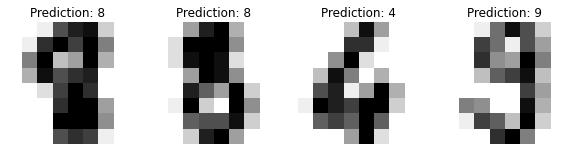

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

We can also compute some metrics of performance on the test set. _Precision_ is the fraction of predictions in a class which are correct. _Recall_ is the fraction of true instances of a class which were correctly precicted. The $F1$ score is the harmonic mean of precision and recall: $F = \frac{2}{ \frac{1}{P} + \frac{1}{R} }$.

Support is the un-normalized version of precision -- the number, rather than fraction, of predictions in a class which are in that class.

In [6]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Alternatively we can look at the "confusion matrix" $C_{ij}$ which counts the number of digits in group $i$ which were predicted to be in group $j$.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


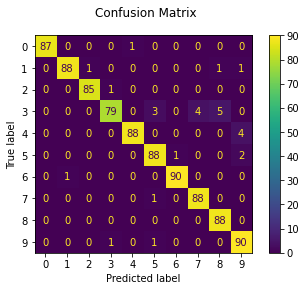

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

There is a first end-to-end example of a machine learning task! The rough steps were as follows:

1. Begin with a collection of labeled data points $(\vec{x}_i, y_i)$ where $y_i$ is the class to which the data point belongs (i.e. which digit it is) and $\vec{x}_i$ is a collection of numbers indicating pixel brightnesses.
2. Choose a machine learning algorithm, which specifies a class of functions $g : X \to Y$ sometimes called the _hypothesis space_ $G$.
3. Perform a training step, which chooses a particular $\hat{g} \in G$ which minimizes some _loss function_ $\mathcal{L}$. Roughly speaking,

$$\hat{g} = \underset{g}{\mathrm{arg \, min}} \, \mathcal{L} ( g \mid x, y ) . $$


4. Evaluate $\hat{g} ( x )$ on a collection of _test points_ $x$ which were not part of the training set.
5. Study the performance of the function $\hat{g}$.


## Example 2: Evolving the Ground State of a Hamiltonian

A different type of machine learning is evolutionary algorithms, and in particular genetic algorithms. This is a class of optimization techniques inspired by biological principles. The idea is the following.

<img src="./Downloads/genetic.png" alt="genetic" style="width: 600px;"/>

Suppose we want to find the ground state of some Hamiltonian. We can follow this evolutionary strategy by initializing a population of random kets, and then allowing them to reproduce in such a way that lower energy kets have greater evolutionary fitness.

We'll do this using the "Quantum Toolbox in Python" (QuTiP) library.

In [8]:
from qutip import *

H = rand_herm(5)
H

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 0.81229755+0.j          0.        +0.j          0.        +0.j
  -0.49559459+0.61952983j  0.73428131-0.12695339j]
 [ 0.        +0.j          0.46328047+0.j         -0.04895608+0.44970751j
   0.        +0.j          0.29003713-0.29073275j]
 [ 0.        +0.j         -0.04895608-0.44970751j -0.42063701+0.j
  -0.06556135+0.45629213j  0.02752046-0.1538459j ]
 [-0.49559459-0.61952983j  0.        +0.j         -0.06556135-0.45629213j
   0.69689207+0.j         -0.38907978+0.05927012j]
 [ 0.73428131+0.12695339j  0.29003713+0.29073275j  0.02752046+0.1538459j
  -0.38907978-0.05927012j  0.2514763 +0.j        ]]

In [9]:
psi = rand_ket_haar(5)
psi

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.44055898-0.11239045j]
 [-0.35110443+0.10442699j]
 [-0.2004327 -0.47762932j]
 [-0.03271941-0.11704814j]
 [-0.23672544-0.56567134j]]

In [10]:
expect(H, psi)

0.07987968989142216

Finding the expectation value of this Hamiltonian in a state is straightforward using the `expect` syntax above.

Of course, we could exactly diagonalize to find the spectrum of $H$.

In [11]:
H.eigenenergies()

array([-0.86012132, -0.33370565,  0.18361187,  0.83357354,  1.97995093])

However, as a proof of concept, suppose that we didn't know how to do this diagonalization. We might want to use an evolutionary algorithm with a reproducing population of kets which should evolve toward the ground state.

(Of course, there are much better algorithms for finding ground states, but we'll consider this toy example.)

First we need some code that will mutate a ket, which should sometimes occur upon reproduction.

<img src="https://miro.medium.com/max/702/1*CGt_UhRqCjIDb7dqycmOAg.png" alt="genetic" style="width: 250px;"/>

In [12]:
def ket_to_array(ket):
    return np.array(ket).flatten()

def ket_to_list(ket):
    return list(ket_to_array(ket))

def mutation(ket, prob_mut):
    """
    Trade the entries of a ket with those of a Haar-random ket if mutation occurs, then re-normalize.
    """
    dim = ket.shape[0]
    
    mutated_ket = rand_ket_haar(dim)
    output_array = ket_to_array(ket)
    
    for i in range(dim):
        random_uniform = np.random.uniform(low = 0, high = 1)
        
        if random_uniform < prob_mut:
        # If mutation occurs, change the corresponding entry to that of the mutated ket.
            output_array[i] = mutated_ket[i]
    
    output_ket = Qobj(output_array).unit()
    
    return output_ket

Another ingredient in genetic algorithms is crossover.

Crossing over allows us to combine the "genetic information" from two parent kets:

![crossover](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/OnePointCrossover.svg/347px-OnePointCrossover.svg.png)

In this case, we randomly choose an index along the ket, then create two parent kets by "cutting and pasting" the basis coefficients of the two kets before and after that index. Then we renormalize.

In [13]:
def crossover(parent_ket_1, parent_ket_2, prob_cross):
    """
    Crosses over two parent kets with some probability.
    
    Crossover occurs by cutting the two parent kets in half and gluing the basis elements before/after the cut to
    create two children.
    """
    dim = parent_ket_1.shape[0]
    
    parent_list_1 = ket_to_list(parent_ket_1)
    parent_list_2 = ket_to_list(parent_ket_2)
    
    # Begin with children as copies of parents.
    child_list_1 = parent_list_1.copy()
    child_list_2 = parent_list_2.copy()
    
    random_uniform = np.random.uniform(low = 0, high = 1)
    
    # Check whether crossover occurs and if so update children.
    if random_uniform < prob_cross:
        # Select random index along the vectors (not at either endpoint).
        cross_point = np.random.randint(1, dim)
        
        # Cut and glue the kets to make children.
        child_list_1 = parent_list_1[:cross_point] + parent_list_2[cross_point:]
        child_list_2 = parent_list_2[:cross_point] + parent_list_1[cross_point:]
        
    child_ket_1 = Qobj(np.array(child_list_1)).unit()
    child_ket_2 = Qobj(np.array(child_list_2)).unit()

    return [child_ket_1, child_ket_2]

In [14]:
def fitness(ket, H):
    """
    This is the function which our genetic algorithm tries to maximize.
    
    Since we want the ground state energy, we simply return the negative expectation value of H in the given state.
    """
    return -expect(H, ket)

def selection(pop, scores, k=3):
    # first random selection
    selected_ket_index = np.random.randint(len(pop))
    
    ## Choose k random kets and compare their scores
    for index in np.random.randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[index] > scores[selected_ket_index]:
            selected_ket_index = index

    return pop[selected_ket_index]

def genetic_algorithm(H, n_iter, n_pop, p_cross, p_mut, dim = 5):
    # Initialize population with Haar-random unitaries acting on reference ket.
    pop = [rand_ket_haar(dim) for i in range(n_pop)]
    average_energies = []
    
    # Keep track of best solution.
    best_ket, best_fitness = pop[0], fitness(pop[0], H)
    
    for gen in range(n_iter):
        
        # Evaluate energies for all candidates in the population.
        scores = [fitness(ket, H) for ket in pop]
        
        average_energies.append(-np.mean(scores))
        
        # Check for new best ground state.
        for i in range(n_pop):
            if scores[i] > best_fitness:
                best_ket, best_fitness = pop[i], scores[i]

        # Select parents by tournament.
        selected = [selection(pop, scores) for i in range(n_pop)]

        # Create the next generation by matching parents.
        children = []
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, p_cross):
                # mutation
                this_child = mutation(c, p_mut)
                # store for next generation
                children.append(this_child)
        # Replace population.
        pop = children
        
    return [best_fitness, best_ket, average_energies]

In [15]:
H = rand_herm(5)
H

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 0.30627011+0.j         -0.94647672+0.41165204j  0.16340219-0.23836837j
   0.34545752+0.83749901j -0.36477249-0.06028585j]
 [-0.94647672-0.41165204j  0.40280265+0.j         -0.14100363-0.1676653j
  -0.23222167+0.42807281j -0.17547876-0.37294489j]
 [ 0.16340219+0.23836837j -0.14100363+0.1676653j   0.        +0.j
  -0.07638583+0.568582j   -0.18661511-0.12284412j]
 [ 0.34545752-0.83749901j -0.23222167-0.42807281j -0.07638583-0.568582j
   0.        +0.j          0.        +0.j        ]
 [-0.36477249+0.06028585j -0.17547876+0.37294489j -0.18661511+0.12284412j
   0.        +0.j          0.83314033+0.j        ]]

In [16]:
output = genetic_algorithm(H, 1000, 100, 0.8, 0.2, dim = 5)

Now we can see how close the best ket has gotten to the true ground state energy (and how close it is to the actual ground state eigenvector).

In [17]:
-output[0]

-1.5376588253812302

In [18]:
gs = H.groundstate()
print("Ground state energy: ", gs[0])
gs[1]

Ground state energy:  -1.5458353980971353


Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[-0.57392164+0.j        ]
 [-0.43983393-0.25403891j]
 [-0.23348262+0.04253228j]
 [ 0.10535137-0.55467629j]
 [-0.17638742+0.08014957j]]

In [19]:
output[1]

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.54127934-0.2192969j ]
 [0.47102275+0.08747541j]
 [0.1766715 -0.10428117j]
 [0.12425387+0.58383633j]
 [0.12062582-0.12833282j]]

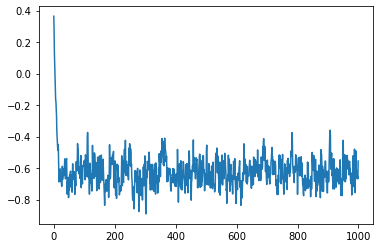

In [20]:
plt.plot(output[2])